c:\Users\86138\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86138\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86138\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86138\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\86138\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_

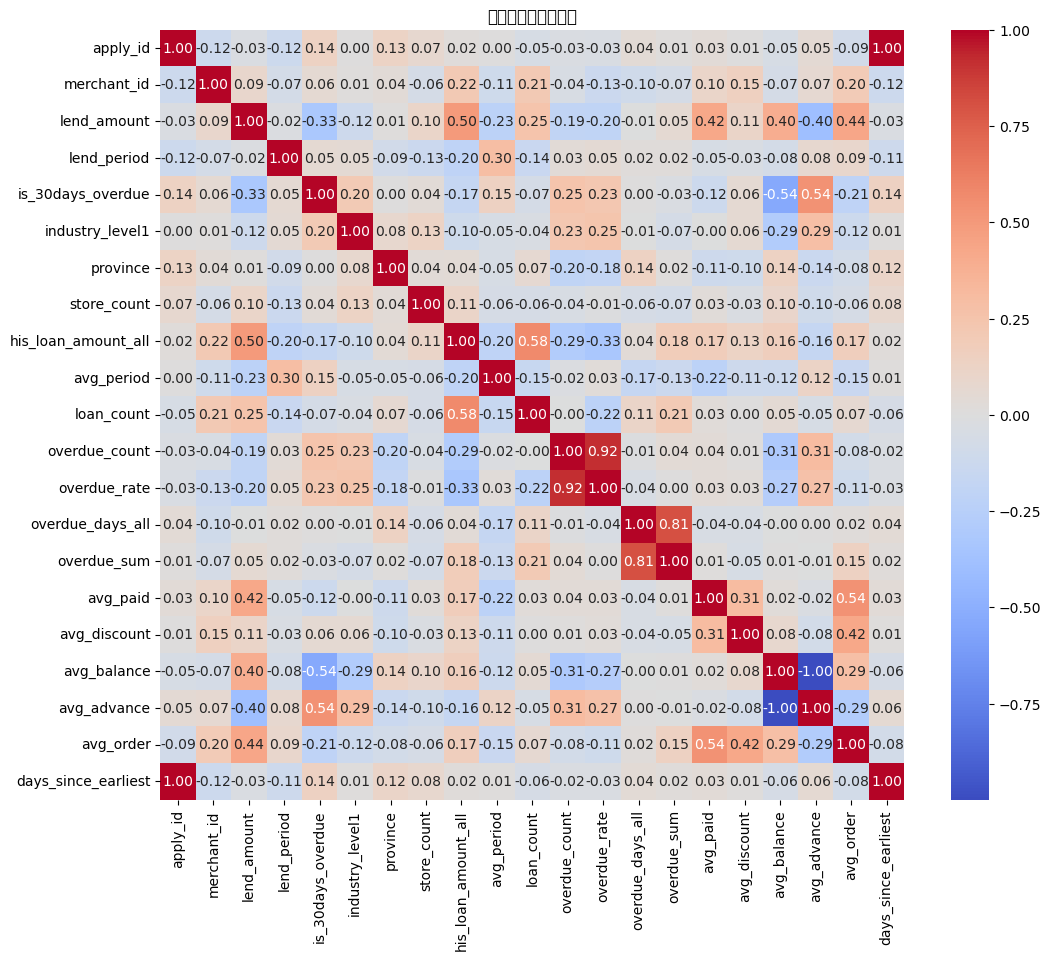

                     apply_id  merchant_id  lend_amount  lend_period  \
apply_id             1.000000    -0.118731    -0.026470    -0.120131   
merchant_id         -0.118731     1.000000     0.092543    -0.072987   
lend_amount         -0.026470     0.092543     1.000000    -0.017327   
lend_period         -0.120131    -0.072987    -0.017327     1.000000   
is_30days_overdue    0.139161     0.058666    -0.326500     0.054803   
industry_level1      0.004918     0.011220    -0.116544     0.052128   
province             0.131270     0.036591     0.012443    -0.093702   
store_count          0.070647    -0.063133     0.103624    -0.127460   
his_loan_amount_all  0.022962     0.215847     0.499694    -0.203599   
avg_period           0.003519    -0.108926    -0.225537     0.295167   
loan_count          -0.047081     0.213865     0.254880    -0.141402   
overdue_count       -0.027446    -0.039396    -0.192132     0.032576   
overdue_rate        -0.033089    -0.129943    -0.198984     0.04

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
data = pd.read_csv('训练1/train_both_his2_updated.txt')

# 将 apply_date 转换为日期格式
data['apply_date'] = pd.to_datetime(data['apply_date'])

# 计算与最早日期的差异（天数）
earliest_date = data['apply_date'].min()
data['days_since_earliest'] = (data['apply_date'] - earliest_date).dt.days

# 删除原始的 apply_date 列
data = data.drop('apply_date', axis=1)

# 计算相关系数矩阵
correlation_matrix = data.corr()

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('字段相关系数热力图')
plt.show()
print(correlation_matrix)
# 获取矩阵的上三角部分，不包括对角线
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 将相关系数与对应的特征对放入列表中
correlation_pairs = upper_tri.stack().reset_index()
correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# 按相关系数的绝对值排序，找出最高的五对
top_correlations = correlation_pairs.reindex(correlation_pairs.Correlation.abs().sort_values(ascending=False).index).head(5)

print(top_correlations)


### 1、neither组

#### ✔1.1 neither用大的训练数据

#### 逻辑回归

In [27]:
#  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_log.txt', index=False)


Accuracy: 0.7166666666666667
Precision: 0.631578947368421
Recall: 0.5454545454545454
F1 Score: 0.5853658536585366


In [29]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_big_log.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_big_log.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_big_log.txt版本预测结果predict_label为1的占比是: 40.00%


#### ✔随机森林

In [24]:
#  ✔
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_rf.txt', index=False)


Accuracy: 0.6958333333333333
Precision: 0.5974025974025974
Recall: 0.5227272727272727
F1 Score: 0.5575757575757576


In [22]:
#  ✔
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 将日期转换为距离最早日期的天数
train_df['apply_date'] = pd.to_datetime(train_df['apply_date'])
test_df['apply_date'] = pd.to_datetime(test_df['apply_date'])
earliest_date = train_df['apply_date'].min()
train_df['days_since_earliest'] = (train_df['apply_date'] - earliest_date).dt.days
test_df['days_since_earliest'] = (test_df['apply_date'] - earliest_date).dt.days

# 定义特征列表
numerical_features = ['apply_id','merchant_id','days_since_earliest','lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_rf.txt', index=False)


Accuracy: 0.7083333333333334
Precision: 0.6153846153846154
Recall: 0.5454545454545454
F1 Score: 0.5783132530120482


In [25]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_big_rf.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_big_rf.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_big_rf.txt版本预测结果predict_label为1的占比是: 55.00%


#### SVM

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 SVC 替换 RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # 使用支持向量机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_svm.txt', index=False)


Accuracy: 0.6625
Precision: 0.5777777777777777
Recall: 0.29545454545454547
F1 Score: 0.39097744360902253


In [103]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_big_svm.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_big_svm.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_big_svm.txt版本预测结果predict_label为1的占比是: 32.50%


#### 决策树

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 DecisionTreeClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # 使用决策树分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_dt.txt', index=False)


Accuracy: 0.6666666666666666
Precision: 0.5625
Recall: 0.4090909090909091
F1 Score: 0.47368421052631576


In [105]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_big_dt.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_big_dt.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_big_dt.txt版本预测结果predict_label为1的占比是: 50.00%


#### MLP

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 MLPClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42))  # 使用多层感知机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_mlp.txt', index=False)


Accuracy: 0.6166666666666667
Precision: 0.475
Recall: 0.4318181818181818
F1 Score: 0.4523809523809524


c:\Users\86138\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [107]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_big_mlp.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_big_mlp.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_big_mlp.txt版本预测结果predict_label为1的占比是: 55.00%


#### 朴素贝叶斯

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/table_loan_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 GaussianNB 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # 使用朴素贝叶斯分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_big_nb.txt', index=False)


Accuracy: 0.6583333333333333
Precision: 0.5267857142857143
Recall: 0.6704545454545454
F1 Score: 0.59


In [109]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_big_nb.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_big_nb.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_big_nb.txt版本预测结果predict_label为1的占比是: 70.00%


#### ❌1.2 neither用小的训练数据

#### 逻辑回归

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_neither_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_small_log.txt', index=False)


Accuracy: 0.5789473684210527
Precision: 0.5789473684210527
Recall: 1.0
F1 Score: 0.7333333333333333


In [111]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_small_log.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_small_log.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_small_log.txt版本预测结果predict_label为1的占比是: 100.00%


#### 随机森林

In [7]:
#  ✔
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_neither_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_small_rf.txt', index=False)


Accuracy: 0.7368421052631579
Precision: 0.7142857142857143
Recall: 0.9090909090909091
F1 Score: 0.8


In [8]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_small_rf.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_small_rf.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_small_rf.txt版本预测结果predict_label为1的占比是: 65.00%


#### SVM

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_neither_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 SVC 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # 使用支持向量机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_small_svm.txt', index=False)


Accuracy: 0.5789473684210527
Precision: 0.5789473684210527
Recall: 1.0
F1 Score: 0.7333333333333333


In [115]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_small_svm.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_small_svm.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_small_svm.txt版本预测结果predict_label为1的占比是: 100.00%


#### 决策树

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_neither_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 DecisionTreeClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # 使用决策树分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_small_dt.txt', index=False)


Accuracy: 0.5789473684210527
Precision: 0.6153846153846154
Recall: 0.7272727272727273
F1 Score: 0.6666666666666666


In [117]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_small_dt.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_small_dt.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_small_dt.txt版本预测结果predict_label为1的占比是: 65.00%


#### MLP

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_neither_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 MLPClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42))  # 使用多层感知机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_small_mlp.txt', index=False)


Accuracy: 0.631578947368421
Precision: 0.6111111111111112
Recall: 1.0
F1 Score: 0.7586206896551724


c:\Users\86138\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [119]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_small_mlp.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_small_mlp.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_small_mlp.txt版本预测结果predict_label为1的占比是: 100.00%


#### 朴素贝叶斯

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_neither_with_merchant_info.txt')
test_df = pd.read_csv('测试1/test_neither_with_merchant_info.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 GaussianNB 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # 使用高斯朴素贝叶斯分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/neither_small_nb.txt', index=False)


Accuracy: 0.5789473684210527
Precision: 0.5789473684210527
Recall: 1.0
F1 Score: 0.7333333333333333


In [121]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/neither_small_nb.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"neither_small_nb.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


neither_small_nb.txt版本预测结果predict_label为1的占比是: 100.00%


### 2、流水组

#### 逻辑回归

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_combined_with_merchant_info_with_store_count_updated.txt')
test_df = pd.read_csv('测试1/test_combined_with_merchant_info_with_store_count_updated.txt')

# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period', 'store_count','avg_paid','avg_discount','avg_balance','avg_advance','avg_order']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/combine_log.txt', index=False)


Accuracy: 0.6428571428571429
Precision: 0.5416666666666666
Recall: 0.5492957746478874
F1 Score: 0.5454545454545454


In [33]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/combine_log.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"combine_log.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


combine_log.txt版本预测结果predict_label为1的占比是: 33.75%


#### ✔随机森林

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_combined_with_merchant_info_with_store_count_updated.txt')
test_df = pd.read_csv('测试1/test_combined_with_merchant_info_with_store_count_updated.txt')


# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period', 'store_count', 'avg_paid', 'avg_discount', 'avg_balance', 'avg_advance', 'avg_order']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/combine_rf.txt', index=False)


Accuracy: 0.7362637362637363
Precision: 0.6825396825396826
Recall: 0.6056338028169014
F1 Score: 0.6417910447761194


In [45]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/combine_rf.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"combine_rf.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


combine_rf.txt版本预测结果predict_label为1的占比是: 34.25%


#### SVM

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_combined_with_merchant_info_with_store_count_updated.txt')
test_df = pd.read_csv('测试1/test_combined_with_merchant_info_with_store_count_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count', 'avg_paid', 'avg_discount', 'avg_balance', 'avg_advance', 'avg_order']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 SVC 替换 RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # 使用支持向量机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/combine_svm.txt', index=False)


Accuracy: 0.6813186813186813
Precision: 0.696969696969697
Recall: 0.323943661971831
F1 Score: 0.4423076923076923


In [130]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/combine_svm.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"combine_svm.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


combine_svm.txt版本预测结果predict_label为1的占比是: 16.00%


#### 决策树

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_combined_with_merchant_info_with_store_count_updated.txt')
test_df = pd.read_csv('测试1/test_combined_with_merchant_info_with_store_count_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count', 'avg_paid', 'avg_discount', 'avg_balance', 'avg_advance', 'avg_order']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 DecisionTreeClassifier 替换之前的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # 使用决策树分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/combine_dt.txt', index=False)


Accuracy: 0.5604395604395604
Precision: 0.4262295081967213
Recall: 0.36619718309859156
F1 Score: 0.3939393939393939


In [134]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/combine_dt.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"combine_dt.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


combine_dt.txt版本预测结果predict_label为1的占比是: 37.25%


#### MLP

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_combined_with_merchant_info_with_store_count_updated.txt')
test_df = pd.read_csv('测试1/test_combined_with_merchant_info_with_store_count_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count', 'avg_paid', 'avg_discount', 'avg_balance', 'avg_advance', 'avg_order']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 MLPClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42))  # 使用多层感知机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/combine_mlp.txt', index=False)


Accuracy: 0.6318681318681318
Precision: 0.532258064516129
Recall: 0.4647887323943662
F1 Score: 0.49624060150375937


c:\Users\86138\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [136]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/combine_mlp.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"combine_mlp.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


combine_mlp.txt版本预测结果predict_label为1的占比是: 31.00%


#### 朴素贝叶斯

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_combined_with_merchant_info_with_store_count_updated.txt')
test_df = pd.read_csv('测试1/test_combined_with_merchant_info_with_store_count_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count', 'avg_paid', 'avg_discount', 'avg_balance', 'avg_advance', 'avg_order']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 GaussianNB 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # 使用高斯朴素贝叶斯分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/combine_nb.txt', index=False)


Accuracy: 0.5439560439560439
Precision: 0.45
Recall: 0.7605633802816901
F1 Score: 0.5654450261780105


In [138]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/combine_nb.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"combine_nb.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


combine_nb.txt版本预测结果predict_label为1的占比是: 59.75%


### 3、历史组

#### ✔3.1 history用大的训练数据

#### 逻辑回归

In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('历史还款数据/history_3.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count','overdue_rate', 'his_loan_amount_all', 'avg_period']

categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_big_log.txt', index=False)


Accuracy: 0.8857142857142857
Precision: 0.88
Recall: 0.8148148148148148
F1 Score: 0.8461538461538461


In [172]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_big_log.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_big_log.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_big_log.txt版本预测结果predict_label为1的占比是: 80.00%


#### ✔随机森林

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# 加载数据
train_df = pd.read_csv('历史还款数据/history_3.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period',  'loan_count',  'overdue_count', 'his_loan_amount_all', 'avg_period', 'overdue_sum' ]
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_big_rf.txt', index=False)

# 获取分类器步骤
classifier = pipeline.named_steps['classifier']

# 获取预处理步骤
preprocessor = pipeline.named_steps['preprocessor']

# 获取数值和类别特征的名称
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# 合并所有特征名
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# 获取特征重要性
feature_importances = classifier.feature_importances_

# 打印特征名和其对应的重要性
for name, importance in zip(all_feature_names, feature_importances):
    print(f"{name}: {importance}")


Accuracy: 0.9047619047619048
Precision: 0.9
Recall: 0.8571428571428571
F1 Score: 0.8780487804878049
apply_id: 0.12400434269234759
merchant_id: 0.05193662636439058
lend_amount: 0.09870125757081172
lend_period: 0.06158607193705993
loan_count: 0.044480343320367606
overdue_count: 0.39168474191770863
his_loan_amount_all: 0.11446653762306232
avg_period: 0.04265950454820891
overdue_sum: 0.010587437867554735
industry_level1_1: 0.012417665672123927
industry_level1_2: 0.016301549839840706
industry_level1_3: 0.004115004947422239
province_1: 0.013430180759900032
province_2: 0.007667119152396668
province_3: 0.005961615786804489


In [53]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_big_rf.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_big_rf.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_big_rf.txt版本预测结果predict_label为1的占比是: 80.00%


#### SVM

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('历史还款数据/history_3.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period', ]
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 SVC 替换 RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # 使用支持向量机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_big_svm.txt', index=False)


Accuracy: 0.8857142857142857
Precision: 0.8518518518518519
Recall: 0.8518518518518519
F1 Score: 0.8518518518518519


In [176]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_big_svm.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_big_svm.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_big_svm.txt版本预测结果predict_label为1的占比是: 80.00%


#### 决策树

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('历史还款数据/history_3.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 DecisionTreeClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # 使用决策树分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_big_dt.txt', index=False)


Accuracy: 0.9
Precision: 0.8846153846153846
Recall: 0.8518518518518519
F1 Score: 0.8679245283018868


In [178]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_big_dt.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_big_dt.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_big_dt.txt版本预测结果predict_label为1的占比是: 70.00%


#### MLP

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('历史还款数据/history_3.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 MLPClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42))  # 使用多层感知机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_big_mlp.txt', index=False)


Accuracy: 0.8857142857142857
Precision: 0.8518518518518519
Recall: 0.8518518518518519
F1 Score: 0.8518518518518519


c:\Users\86138\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [180]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_big_mlp.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_big_mlp.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_big_mlp.txt版本预测结果predict_label为1的占比是: 70.00%


#### 朴素贝叶斯

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('历史还款数据/history_3.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 GaussianNB 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # 使用高斯朴素贝叶斯分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_big_nb.txt', index=False)


Accuracy: 0.8857142857142857
Precision: 0.8518518518518519
Recall: 0.8518518518518519
F1 Score: 0.8518518518518519


In [182]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_big_nb.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_big_nb.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_big_nb.txt版本预测结果predict_label为1的占比是: 80.00%


#### ❌3.2 history用小的训练数据

#### 逻辑回归

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_history_2.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count','overdue_rate', 'his_loan_amount_all', 'avg_period']

categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_small_log.txt', index=False)


Accuracy: 0.5714285714285714
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5714285714285714


In [184]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_small_log.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_small_log.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_small_log.txt版本预测结果predict_label为1的占比是: 100.00%


#### 随机森林

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_history_2.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period', ]
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_small_rf.txt', index=False)

# 获取分类器步骤
classifier = pipeline.named_steps['classifier']

# 获取预处理步骤
preprocessor = pipeline.named_steps['preprocessor']

# 获取数值和类别特征的名称
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# 合并所有特征名
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# 获取特征重要性
feature_importances = classifier.feature_importances_

# 打印特征名和其对应的重要性
for name, importance in zip(all_feature_names, feature_importances):
    print(f"{name}: {importance}")


Accuracy: 0.42857142857142855
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333
lend_amount: 0.2096678867975663
lend_period: 0.1678733957423949
loan_count: 0.013138646669967367
overdue_rate: 0.0839515876119548
his_loan_amount_all: 0.2584383809982046
avg_period: 0.08445903558729158
industry_level1_1: 0.033443066870001495
industry_level1_2: 0.031352689977947816
industry_level1_3: 0.005521011290406791
province_1: 0.051333227264890716
province_2: 0.021478385622190125
province_3: 0.039342685567183545


In [187]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_small_rf.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_small_rf.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_small_rf.txt版本预测结果predict_label为1的占比是: 70.00%


#### SVM

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_history_2.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period', ]
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 SVC 替换 RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # 使用支持向量机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_small_svm.txt', index=False)


Accuracy: 0.5714285714285714
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5714285714285714


In [189]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_small_svm.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_small_svm.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_small_svm.txt版本预测结果predict_label为1的占比是: 80.00%


#### 决策树

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_history_2.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 DecisionTreeClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # 使用决策树分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_small_dt.txt', index=False)


Accuracy: 0.5714285714285714
Precision: 0.5
Recall: 0.3333333333333333
F1 Score: 0.4


In [191]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_small_dt.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_small_dt.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_small_dt.txt版本预测结果predict_label为1的占比是: 80.00%


#### MLP

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_history_2.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period',  'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 MLPClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42))  # 使用多层感知机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_small_mlp.txt', index=False)


Accuracy: 0.42857142857142855
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333


c:\Users\86138\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [193]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_small_mlp.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_small_mlp.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_small_mlp.txt版本预测结果predict_label为1的占比是: 100.00%


#### 朴素贝叶斯

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_history_2.txt')
test_df = pd.read_csv('测试1/test_history_2.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'loan_count', 'overdue_rate', 'his_loan_amount_all', 'avg_period']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 GaussianNB 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # 使用高斯朴素贝叶斯分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/history_small_nb.txt', index=False)


Accuracy: 0.42857142857142855
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333


In [195]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/history_small_nb.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"history_small_nb.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


history_small_nb.txt版本预测结果predict_label为1的占比是: 40.00%


### 4、both组

#### 逻辑回归

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_both_his2_updated.txt')
test_df = pd.read_csv('测试1/test_both_his2_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count','overdue_count', 'loan_count', 'overdue_rate',  'his_loan_amount_all', 'avg_period', 'overdue_days_all', 'overdue_sum', 'avg_discount', 'avg_paid', 'avg_order', 'avg_balance', 'avg_advance']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/both_log.txt', index=False)


Accuracy: 0.7575757575757576
Precision: 0.4444444444444444
Recall: 0.5714285714285714
F1 Score: 0.5


In [202]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/both_log.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"both_log.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


both_log.txt版本预测结果predict_label为1的占比是: 30.77%


#### ✔随机森林

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_both_his2_updated.txt')
test_df = pd.read_csv('测试1/test_both_his2_updated.txt')



# 定义特征列表
numerical_features = ['apply_id','merchant_id','lend_amount', 'lend_period','store_count','loan_count','overdue_count',  'overdue_rate',  'his_loan_amount_all', 'avg_period','overdue_days_all', 'overdue_sum', 'avg_discount', 'avg_paid', 'avg_order', 'avg_balance', 'avg_advance']
categorical_features = ['industry_level1','province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 RandomForestClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # 使用随机森林分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/both_rf.txt', index=False)

# 获取分类器步骤
classifier = pipeline.named_steps['classifier']

# 获取预处理步骤
preprocessor = pipeline.named_steps['preprocessor']

# 获取数值和类别特征的名称
num_feature_names = numerical_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# 合并所有特征名
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# 获取特征重要性
feature_importances = classifier.feature_importances_

# 打印特征名和其对应的重要性
for name, importance in zip(all_feature_names, feature_importances):
    print(f"{name}: {importance}")


Accuracy: 0.7575757575757576
Precision: 0.45454545454545453
Recall: 0.7142857142857143
F1 Score: 0.5555555555555556
apply_id: 0.052878020860220205
merchant_id: 0.0465480584508817
lend_amount: 0.10118802962985868
lend_period: 0.01786035280442949
store_count: 0.016222197041577034
loan_count: 0.012346390543755179
overdue_count: 0.01745112352827993
overdue_rate: 0.021388988410662325
his_loan_amount_all: 0.09020496198435883
avg_period: 0.035524242742628435
overdue_days_all: 0.004778598843743811
overdue_sum: 0.001447064223978646
avg_discount: 0.0366738191639127
avg_paid: 0.06808179048548939
avg_order: 0.14652006509035578
avg_balance: 0.1236546149837878
avg_advance: 0.14389952545010914
industry_level1_1: 0.013491682444765505
industry_level1_2: 0.012104924028872577
industry_level1_3: 0.009778597531630432
province_1: 0.015382735039672836
province_2: 0.00765703711463735
province_3: 0.0049171796023922175


In [20]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/both_rf.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"both_rf.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


both_rf.txt版本预测结果predict_label为1的占比是: 38.46%


#### SVM

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_both_his2_updated.txt')
test_df = pd.read_csv('测试1/test_both_his2_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count','overdue_count', 'loan_count', 'overdue_rate',  'his_loan_amount_all', 'avg_period', 'overdue_days_all',  'avg_discount', 'avg_paid', 'avg_order', 'avg_balance', 'avg_advance']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 SVC 替换 RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))  # 使用支持向量机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/both_svm.txt', index=False)


Accuracy: 0.7575757575757576
Precision: 0.4444444444444444
Recall: 0.5714285714285714
F1 Score: 0.5


In [214]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/both_svm.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"both_svm.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


both_svm.txt版本预测结果predict_label为1的占比是: 26.15%


#### 决策树

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_both_his2_updated.txt')
test_df = pd.read_csv('测试1/test_both_his2_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count','overdue_count', 'loan_count', 'overdue_rate',  'his_loan_amount_all', 'avg_period', 'overdue_days_all',  'avg_discount', 'avg_paid', 'avg_order', 'avg_balance', 'avg_advance']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 DecisionTreeClassifier 替换 LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))  # 使用决策树分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/both_dt.txt', index=False)


Accuracy: 0.696969696969697
Precision: 0.38461538461538464
Recall: 0.7142857142857143
F1 Score: 0.5


In [216]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/both_dt.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"both_dt.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


both_dt.txt版本预测结果predict_label为1的占比是: 36.92%


#### MLP

In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_both_his2_updated.txt')
test_df = pd.read_csv('测试1/test_both_his2_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count','overdue_count', 'loan_count', 'overdue_rate',  'his_loan_amount_all', 'avg_period', 'overdue_days_all',  'avg_discount', 'avg_paid', 'avg_order', 'avg_balance', 'avg_advance']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 MLPClassifier 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42))  # 使用多层感知机分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/both_mlp.txt', index=False)


Accuracy: 0.696969696969697
Precision: 0.2857142857142857
Recall: 0.2857142857142857
F1 Score: 0.2857142857142857


c:\Users\86138\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [218]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/both_mlp.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"both_mlp.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


both_mlp.txt版本预测结果predict_label为1的占比是: 27.69%


#### 朴素贝叶斯

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
train_df = pd.read_csv('训练1/train_both_his2_updated.txt')
test_df = pd.read_csv('测试1/test_both_his2_updated.txt')

# 定义特征列表
numerical_features = ['lend_amount', 'lend_period', 'store_count','overdue_count', 'loan_count', 'overdue_rate',  'his_loan_amount_all', 'avg_period', 'overdue_days_all',  'avg_discount', 'avg_paid', 'avg_order', 'avg_balance', 'avg_advance']
categorical_features = ['industry_level1', 'province']

# 使用 ColumnTransformer 进行转换
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 定义模型管道，使用 GaussianNB 替换原有的分类器
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # 使用高斯朴素贝叶斯分类器
])

# 准备特征和标签
X = train_df[numerical_features + categorical_features]
y = train_df['is_30days_overdue']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
pipeline.fit(X_train, y_train)

# 在验证集上评估模型
y_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, zero_division=0))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

# 预测测试集
X_test = test_df[numerical_features + categorical_features]
test_pred = pipeline.predict(X_test)

# 保存预测结果
results_df = pd.DataFrame({'apply_id': test_df['apply_id'], 'predict_label': test_pred})
results_df.to_csv('预测结果/both_nb.txt', index=False)


Accuracy: 0.45454545454545453
Precision: 0.2608695652173913
Recall: 0.8571428571428571
F1 Score: 0.4


In [220]:
import pandas as pd

# 加载数据
data = pd.read_csv('预测结果/both_nb.txt')

# 计算predict_label为1的占比
overdue_count = data['predict_label'].sum()
total_count = data.shape[0]
overdue_ratio = overdue_count / total_count

# 打印结果
print(f"both_nb.txt版本预测结果predict_label为1的占比是: {overdue_ratio:.2%}")


both_nb.txt版本预测结果predict_label为1的占比是: 60.00%
